## Setup and Load Data

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib 

In [2]:
import tensorflow as tf 
import os 
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd 

In [3]:
# avoid OOM error by limiting GPU memory consumption 
gpus = tf. config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True) 

### Load Data

dataset from kaggle: https://www.kaggle.com/datasets/hasyimabdillah/workoutexercises-images/data

In [ ]:
 #   for tf dataset pipeline documentation run this code, otherwise skip it 
 tf.data.Dataset??

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 13853 files belonging to 22 classes.


In [7]:
class_names= data.class_names
num_classes = len( class_names)

In [8]:
data_iterator = data.as_numpy_iterator() 
data_iterator

In [9]:
# images represented as numpy arrays in batches of 32 images (check documentation )
batch = data_iterator.next() 

In [10]:
#labels 
batch[1]

array([ 1,  4, 13,  4,  5,  6, 15,  8, 11,  8, 13, 12, 16,  5, 15, 13,  9,
        9,  7,  4, 18, 10, 21, 15,  7,  3, 17, 10, 16, 18,  8, 10])

In [11]:
#number of batches 
len(data)

433

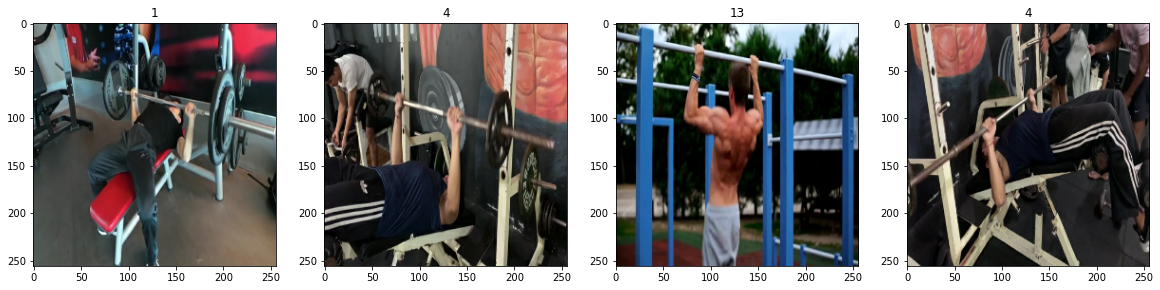

In [12]:
#check the some images of the batch with their respective class

fig, ax = plt.subplots(ncols=4, figsize = (20, 20))

for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocess data

#### scale data

In [13]:
scale_data = data.map(lambda x,y: (x/255, y))

scaled_iterator = scale_data.as_numpy_iterator()

batch = scaled_iterator.next()

#### split data

In [14]:
len(scale_data)

433

In [15]:
# 70 % for training , 20% for validation and 10% for testing 

train_size = int(len(scale_data)* .7)

val_size = int(len(scale_data)* .2)

test_size = int(len(scale_data)* .1) + 1

In [16]:
train = scale_data.take(train_size)

val = scale_data.skip(train_size).take(val_size)

test = scale_data.skip(train_size + val_size).take(test_size)

## Deep Learning 


#### Build Deep Learnig Model

In [17]:
#model dependencies 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout 

In [18]:
model = Sequential()

####  Basic/first Arquitecture

In [ ]:
#convolution blocks 
#input layer
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

In [25]:
model.compile('adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [26]:
# Summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

###

## Training the model

In [28]:
logDir = 'logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logDir)

In [29]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
303/303 [==============================] - 35s 112ms/step - loss: 0.0378 - accuracy: 0.9901 - val_loss: 0.3815 - val_accuracy: 0.9440
Epoch 2/20
303/303 [==============================] - 29s 96ms/step - loss: 0.0269 - accuracy: 0.9928 - val_loss: 0.3848 - val_accuracy: 0.9455
Epoch 3/20
303/303 [==============================] - 30s 99ms/step - loss: 0.0124 - accuracy: 0.9968 - val_loss: 0.4923 - val_accuracy: 0.9422
Epoch 4/20
303/303 [==============================] - 29s 96ms/step - loss: 0.0219 - accuracy: 0.9944 - val_loss: 0.3607 - val_accuracy: 0.9484
Epoch 5/20
303/303 [==============================] - 31s 100ms/step - loss: 0.0300 - accuracy: 0.9921 - val_loss: 0.5609 - val_accuracy: 0.9313
Epoch 6/20
303/303 [==============================] - 28s 92ms/step - loss: 0.0367 - accuracy: 0.9909 - val_loss: 0.3751 - val_accuracy: 0.9473
Epoch 7/20
303/303 [==============================] - 21s 68ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.4206 - val_accurac

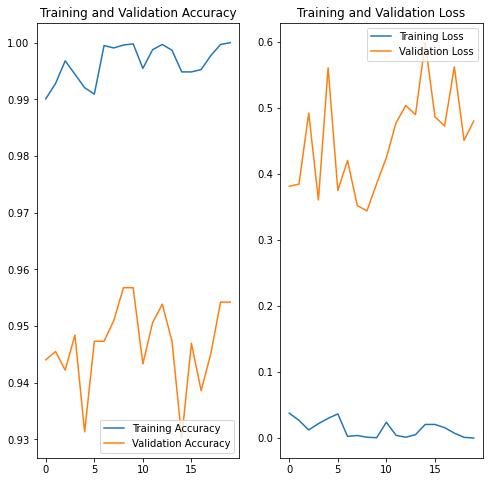

In [30]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()